In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import json
import powerlaw
import geopandas as gdp
import scipy

In [2]:
%matplotlib inline

In [3]:
!ls ../geo_data

OA_2021_EW_BFC_V7.cpg
OA_2021_EW_BFC_V7.dbf
OA_2021_EW_BFC_V7.prj
OA_2021_EW_BFC_V7.shp
OA_2021_EW_BFC_V7.shx
Output_Areas_Dec_2021_Boundaries_Full_Clipped_EW_BFC_2022_-340120420164038365.csv
Output_Areas_Dec_2021_Boundaries_Full_Clipped_EW_BFC_2022_5714326745691218172.zip
PARNCP_DEC_2021_EW_BSC.cpg
PARNCP_DEC_2021_EW_BSC.dbf
PARNCP_DEC_2021_EW_BSC.prj
PARNCP_DEC_2021_EW_BSC.shp
PARNCP_DEC_2021_EW_BSC.shx
Parishes_and_Non_Civil_Parished_Areas_(December_2021)_EW_BSC.xml
Parishes_and_Non_Civil_Parished_Areas_(December_2021)_EW_BSC.zip
Sheffield Primary School Catchments 2016 17 2.zip
Sheffield_Primary_School_Catchments_2016-17.cpg
Sheffield_Primary_School_Catchments_2016-17.dbf
Sheffield_Primary_School_Catchments_2016-17.prj
Sheffield_Primary_School_Catchments_2016-17.sbn
Sheffield_Primary_School_Catchments_2016-17.sbx
Sheffield_Primary_School_Catchments_2016-17.shp
Sheffield_Primary_School_Catchments_2016-17.shp.xml
Sheffield_Primary_School_Catchments_2016-17.shx


In [4]:
geo_df = gdp.read_file('../geo_data/Sheffield_Primary_School_Catchments_2016-17.shp')
geo_df.head()

,CATCH_NUM,CATCHMENT,Shape_area,Shape_len,geometry
0,2001,Abbey Lane IJ,2.812735e+06,11091.133823,"POLYGON ((434127.999 383317.331, 434148.002 38..."
1,2002,Nether Edge NIJ,8.801766e+05,5517.909354,"POLYGON ((434152.875 385479.565, 434160.976 38..."
2,2343,Anns Grove NIJ,1.203991e+06,7690.489053,"POLYGON ((436026.927 386125.100, 436032.880 38..."
3,3429,Arbourthorne NIJ,8.184401e+05,5726.122791,"POLYGON ((436449.297 384640.032, 436458.705 38..."
4,2322,Bankwood NIJ,1.252839e+06,6128.917022,"POLYGON ((436110.697 384694.737, 436125.299 38..."


In [5]:
geo_df.to_crs(epsg=3857, inplace=True)

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_57433/677303777.py:5: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  overall_polygon = gdp.GeoSeries(cascaded_union(geo_df.geometry))


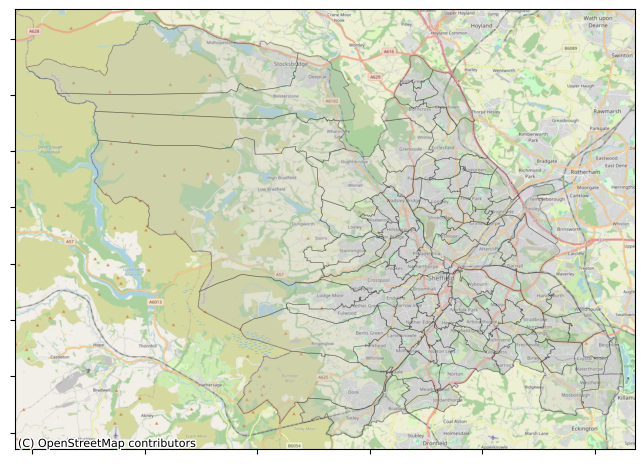

In [6]:
from shapely.ops import cascaded_union

fig, ax = plt.subplots(figsize=(8,12))
# Define Overall Polygon
overall_polygon = gdp.GeoSeries(cascaded_union(geo_df.geometry))
# Define bounding box
bounds = overall_polygon.bounds
bounding_box = [
    bounds['minx'][0],
    bounds['maxx'][0],
    bounds['miny'][0],
    bounds['maxy'][0],
]
# Set bounds
ax.set_xlim(bounding_box[0]-1000, bounding_box[1] + 1000)
ax.set_ylim(bounding_box[2]-1000, bounding_box[3] + 1000)

# Plot borough borders
geo_df.plot(
    ax=ax, 
    alpha=0.3, 
    edgecolor='black', 
    linewidth=0.5,
    facecolor='silver',
)

import contextily as cx # map backgrounds
# Add background
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# Remove axis 
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.show()

In [7]:
!ls ../data

AddressBase Core CSV.zip
Data
Documents
Index_of_Multiple_Deprivation_(Dec_2019)_Lookup_in_England.csv
NSUL_NOV_2023.zip
OA_(2011)_to_OA_(2021)_to_Local_Authority_District_(2022)_for_England_and_Wales_Lookup_(Version_2).csv
OAs_(2021)_to_Civil_Parish_and_Non-Civil_Parished_Areas_to_LTLA_to_UTLA_to_Region_to_Country_(May_2022)_Lookup_in_England_and_Wales.csv
Output_Area_to_Lower_layer_Super_Output_Area_to_Middle_layer_Super_Output_Area_to_Local_Authority_District_(December_2011)_Lookup_in_England_and_Wales.csv
RUC11_OA11_EW.csv
User Guide
addressbase-core-sample.csv
all_data_final_Cambridgeshire.json
all_data_final_Cumbria.json
all_data_final_Derbyshire.json
all_data_final_Devon.json
all_data_final_East Sussex.json
all_data_final_Essex.json
all_data_final_Gloucestershire.json
all_data_final_Greater Manchester.json
all_data_final_Hampshire.json
all_data_final_Hertfordshire.json
all_data_final_Inner London.json
all_data_final_Kent.json
all_data_final_Lancashire.json
all_data_final_Leicest

In [8]:
school_data = pd.read_csv('../data/edubasealldata20230519.csv', encoding = "ISO-8859-1")
school_data.head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_57433/164457799.py:1: DtypeWarning: Columns (30,31,38,46,48,50,51,55,72,73,81,86,87,88,89,90,91,92,93,94,95,96,117,120,121,125,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  school_data = pd.read_csv('../data/edubasealldata20230519.csv', encoding = "ISO-8859-1")


,URN,LA (code),LA (name),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (code),TypeOfEstablishment (name),EstablishmentTypeGroup (code),EstablishmentTypeGroup (name),EstablishmentStatus (code),...,SiteName,QABName (code),QABName (name),EstablishmentAccredited (code),EstablishmentAccredited (name),QABReport,CHNumber,MSOA (code),LSOA (code),FSM
0,100000,201,City of London,3614.0,The Aldgate School,2,Voluntary aided school,4,Local authority maintained schools,1,...,NaN,0,Not applicable,0,Not applicable,NaN,NaN,E02000001,E01032739,62.0
1,100001,201,City of London,6005.0,City of London School for Girls,11,Other independent school,3,Independent schools,1,...,NaN,0,Not applicable,0,Not applicable,NaN,NaN,E02000001,E01000002,0.0
2,100002,201,City of London,6006.0,St Paul's Cathedral School,11,Other independent school,3,Independent schools,1,...,NaN,0,Not applicable,0,Not applicable,NaN,NaN,E02000001,E01032739,0.0
3,100003,201,City of London,6007.0,City of London School,11,Other independent school,3,Independent schools,1,...,NaN,0,Not applicable,0,Not applicable,NaN,NaN,E02000001,E01032739,0.0
4,100004,202,Camden,1045.0,Sherborne Nursery School,15,Local authority nursery school,4,Local authority maintained schools,2,...,NaN,0,Not applicable,0,Not applicable,NaN,NaN,E02000172,E01000901,NaN


In [9]:
school_data.columns.values

array(['URN', 'LA (code)', 'LA (name)', 'EstablishmentNumber',
       'EstablishmentName', 'TypeOfEstablishment (code)',
       'TypeOfEstablishment (name)', 'EstablishmentTypeGroup (code)',
       'EstablishmentTypeGroup (name)', 'EstablishmentStatus (code)',
       'EstablishmentStatus (name)', 'ReasonEstablishmentOpened (code)',
       'ReasonEstablishmentOpened (name)', 'OpenDate',
       'ReasonEstablishmentClosed (code)',
       'ReasonEstablishmentClosed (name)', 'CloseDate',
       'PhaseOfEducation (code)', 'PhaseOfEducation (name)',
       'StatutoryLowAge', 'StatutoryHighAge', 'Boarders (code)',
       'Boarders (name)', 'NurseryProvision (name)',
       'OfficialSixthForm (code)', 'OfficialSixthForm (name)',
       'Gender (code)', 'Gender (name)', 'ReligiousCharacter (code)',
       'ReligiousCharacter (name)', 'ReligiousEthos (name)',
       'Diocese (code)', 'Diocese (name)', 'AdmissionsPolicy (code)',
       'AdmissionsPolicy (name)', 'SchoolCapacity',
       'SpecialCl

In [10]:
import pyproj

crs_british = pyproj.Proj(init='EPSG:27700')
crs_wgs84 = pyproj.Proj(init='EPSG:4326')

long, lat = pyproj.transform(crs_british, crs_wgs84, 517393.6563, 194035.5469)
print(lat, long)

51.6328909046718 -0.3052119183057833


/Users/msharpe/Downloads/new_parishes_shapefiles/my_project/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/msharpe/Downloads/new_parishes_shapefiles/my_project/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_57433/216215088.py:6: FutureWarning: This function is deprecated. See: 

### Sheffield Schools

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_57433/4136782563.py:3: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  boundary = gdp.GeoSeries(cascaded_union(polygons))


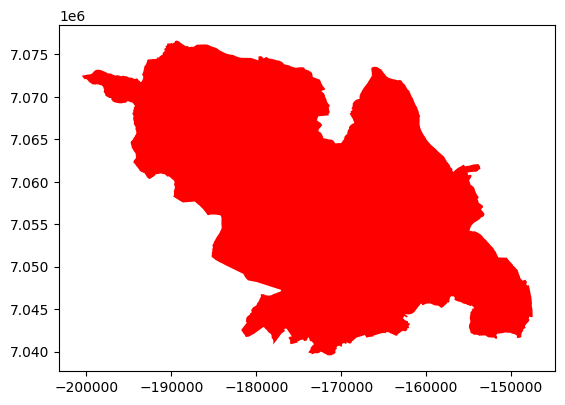

In [11]:
from shapely.ops import cascaded_union
polygons = geo_df.geometry.values
boundary = gdp.GeoSeries(cascaded_union(polygons))
boundary.plot(color = 'red')
plt.show()

In [12]:
from shapely.geometry import Point

def to_keep(x, bounds):
    easting = x['Easting']
    northing = x['Northing']
    long, lat = pyproj.transform(crs_british, crs_wgs84, easting, northing)
    p = Point(long, lat)
    return bounds.contains(p)

In [13]:
def convert_thing(x):
    easting = x['Easting']
    northing = x['Northing']
    long, lat = pyproj.transform(crs_british, crs_wgs84, easting, northing)
    return long, lat

In [14]:
sheffield_schools = school_data[school_data['LA (name)'] == 'Sheffield']
sheffield_schools.shape

(465, 139)

In [16]:
from geopandas import GeoDataFrame

In [17]:
geometry = [Point(xy) for xy in zip(sheffield_schools['Easting'], sheffield_schools['Northing'])]
crs = 'EPSG:27700'
sheff_gdf = GeoDataFrame(sheffield_schools, geometry=geometry, crs=crs)
sheff_gdf = sheff_gdf.to_crs('3857')
sheff_gdf.head()

,URN,LA (code),LA (name),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (code),TypeOfEstablishment (name),EstablishmentTypeGroup (code),EstablishmentTypeGroup (name),EstablishmentStatus (code),...,QABName (code),QABName (name),EstablishmentAccredited (code),EstablishmentAccredited (name),QABReport,CHNumber,MSOA (code),LSOA (code),FSM,geometry
6967,106973,373,Sheffield,1000.0,Broomhall Nursery School,15,Local authority nursery school,4,Local authority maintained schools,1,...,0,Not applicable,0,Not applicable,NaN,NaN,E02006844,E01008115,2.0,POINT (-165454.616 7052701.286)
6968,106974,373,Sheffield,1001.0,Denby Street Nursery School,15,Local authority nursery school,4,Local authority maintained schools,2,...,0,Not applicable,0,Not applicable,NaN,NaN,E02001650,E01008105,NaN,POINT (-164037.721 7051969.749)
6969,106975,373,Sheffield,1002.0,Grace Owen Nursery School,15,Local authority nursery school,4,Local authority maintained schools,1,...,0,Not applicable,0,Not applicable,NaN,NaN,E02006868,E01033268,3.0,POINT (-162351.547 7053917.910)
6970,106976,373,Sheffield,1003.0,Birley Nursery School,15,Local authority nursery school,4,Local authority maintained schools,2,...,0,Not applicable,0,Not applicable,NaN,NaN,E02006869,E01007842,NaN,POINT (-156239.365 7046545.000)
6971,106977,373,Sheffield,1005.0,Wybourn Nursery School,15,Local authority nursery school,4,Local authority maintained schools,2,...,0,Not applicable,0,Not applicable,NaN,NaN,E02006868,E01007878,NaN,POINT (-160926.368 7053400.350)


In [18]:
geo_df.head()

,CATCH_NUM,CATCHMENT,Shape_area,Shape_len,geometry
0,2001,Abbey Lane IJ,2.812735e+06,11091.133823,"POLYGON ((-165736.576 7047192.556, -165703.449..."
1,2002,Nether Edge NIJ,8.801766e+05,5517.909354,"POLYGON ((-165669.086 7050817.062, -165655.826..."
2,2343,Anns Grove NIJ,1.203991e+06,7690.489053,"POLYGON ((-162526.055 7051876.426, -162516.392..."
3,3429,Arbourthorne NIJ,8.184401e+05,5726.122791,"POLYGON ((-161838.427 7049380.957, -161822.607..."
4,2322,Bankwood NIJ,1.252839e+06,6128.917022,"POLYGON ((-162404.033 7049476.989, -162379.696..."


In [19]:
sheff_gdf[sheff_gdf.EstablishmentName.apply(lambda x: 'Abbey' in x)]

,URN,LA (code),LA (name),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (code),TypeOfEstablishment (name),EstablishmentTypeGroup (code),EstablishmentTypeGroup (name),EstablishmentStatus (code),...,QABName (code),QABName (name),EstablishmentAccredited (code),EstablishmentAccredited (name),QABReport,CHNumber,MSOA (code),LSOA (code),FSM,geometry
6976,106982,373,Sheffield,2001.0,Abbey Lane Primary School,1,Community school,4,Local authority maintained schools,1,...,0,Not applicable,0,Not applicable,NaN,NaN,E02001676,E01007834,78.0,POINT (-165304.541 7045884.974)
7130,107137,373,Sheffield,4254.0,Abbeydale Grange School,5,Foundation school,4,Local authority maintained schools,2,...,0,Not applicable,0,Not applicable,NaN,NaN,E02001665,E01007929,NaN,POINT (-166674.610 7047671.353)
42001,143052,373,Sheffield,2046.0,Abbeyfield Primary Academy,28,Academy sponsor led,10,Academies,1,...,0,Not applicable,0,Not applicable,NaN,NaN,E02001629,E01007870,175.0,POINT (-162968.045 7057855.680)


In [20]:
sheff_gdf.groupby('PhaseOfEducation (name)').size().sort_values(ascending=False)

PhaseOfEducation (name)
Primary                    293
Secondary                   69
Not applicable              67
Middle deemed primary       22
Nursery                      5
16 plus                      4
All-through                  3
Middle deemed secondary      2
dtype: int64

In [21]:
pd.set_option('display.max_columns', 500)

In [22]:
sheff_gdf[sheff_gdf['PhaseOfEducation (name)'] == 'Primary'].head()

,URN,LA (code),LA (name),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (code),TypeOfEstablishment (name),EstablishmentTypeGroup (code),EstablishmentTypeGroup (name),EstablishmentStatus (code),EstablishmentStatus (name),ReasonEstablishmentOpened (code),ReasonEstablishmentOpened (name),OpenDate,ReasonEstablishmentClosed (code),ReasonEstablishmentClosed (name),CloseDate,PhaseOfEducation (code),PhaseOfEducation (name),StatutoryLowAge,StatutoryHighAge,Boarders (code),Boarders (name),NurseryProvision (name),OfficialSixthForm (code),OfficialSixthForm (name),Gender (code),Gender (name),ReligiousCharacter (code),ReligiousCharacter (name),ReligiousEthos (name),Diocese (code),Diocese (name),AdmissionsPolicy (code),AdmissionsPolicy (name),SchoolCapacity,SpecialClasses (code),SpecialClasses (name),CensusDate,NumberOfPupils,NumberOfBoys,NumberOfGirls,PercentageFSM,TrustSchoolFlag (code),TrustSchoolFlag (name),Trusts (code),Trusts (name),SchoolSponsorFlag (name),SchoolSponsors (name),FederationFlag (name),Federations (code),Federations (name),UKPRN,FEHEIdentifier,FurtherEducationType (name),OfstedLastInsp,OfstedSpecialMeasures (code),OfstedSpecialMeasures (name),LastChangedDate,Street,Locality,Address3,Town,County (name),Postcode,SchoolWebsite,TelephoneNum,HeadTitle (name),HeadFirstName,HeadLastName,HeadPreferredJobTitle,BSOInspectorateName (name),InspectorateReport,DateOfLastInspectionVisit,NextInspectionVisit,TeenMoth (name),TeenMothPlaces,CCF (name),SENPRU (name),EBD (name),PlacesPRU,FTProv (name),EdByOther (name),Section41Approved (name),SEN1 (name),SEN2 (name),SEN3 (name),SEN4 (name),SEN5 (name),SEN6 (name),SEN7 (name),SEN8 (name),SEN9 (name),SEN10 (name),SEN11 (name),SEN12 (name),SEN13 (name),TypeOfResourcedProvision (name),ResourcedProvisionOnRoll,ResourcedProvisionCapacity,SenUnitOnRoll,SenUnitCapacity,GOR (code),GOR (name),DistrictAdministrative (code),DistrictAdministrative (name),AdministrativeWard (code),AdministrativeWard (name),ParliamentaryConstituency (code),ParliamentaryConstituency (name),UrbanRural (code),UrbanRural (name),GSSLACode (name),Easting,Northing,MSOA (name),LSOA (name),InspectorateName (name),SENStat,SENNoStat,BoardingEstablishment (name),PropsName,PreviousLA (code),PreviousLA (name),PreviousEstablishmentNumber,OfstedRating (name),RSCRegion (name),Country (name),UPRN,SiteName,QABName (code),QABName (name),EstablishmentAccredited (code),EstablishmentAccredited (name),QABReport,CHNumber,MSOA (code),LSOA (code),FSM,geometry
6976,106982,373,Sheffield,2001.0,Abbey Lane Primary School,1,Community school,4,Local authority maintained schools,1,Open,0,Not applicable,NaN,0,Not applicable,NaN,2,Primary,4.0,11.0,1,No boarders,No Nursery Classes,2,Does not have a sixth form,3,Mixed,0,Does not apply,Does not apply,0000,Not applicable,0,Not applicable,630.0,2,No Special Classes,20-01-2022,561.0,279.0,282.0,13.9,0,Not applicable,NaN,NaN,Not applicable,NaN,Not under a federation,NaN,NaN,10072602.0,NaN,Not applicable,20-03-2018,0,Not applicable,02-05-2023,Abbey Lane,NaN,NaN,Sheffield,South Yorkshire,S8 0BN,www.abbeylaneprimaryschool.com,1.142745e+09,Mrs,Maxine,Stafford,Headteacher,Not applicable,NaN,NaN,NaN,Not applicable,NaN,Not applicable,Not applicable,Not applicable,NaN,NaN,Not applicable,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable,NaN,NaN,NaN,NaN,D,Yorkshire and the Humber,E08000019,Sheffield,E05010857,Beauchief and Greenhill,E14000923,"Sheffield, Heeley",B1,(England/Wales) Urban minor conurbation,E08000019,434392.0,382539.0,Sheffield 066,Sheffield 066D,NaN,NaN,NaN,NaN,NaN,999,NaN,NaN,Good,East Midlands and the Humber,NaN,1.000521e+11,NaN,0,Not applicable,0,Not applicable,NaN,NaN,E02001676,E01007834,78.0,POINT (-165304.541 7045884.974)
6977,106983,373,Sheffield,2002.0,The Nether Edge Primary School,1,Community school,4,Local authority maintained schools,2,Closed,0,Not applicable,NaN,10,Academy Converter,31-08-2015,2,Primary,3.0,11.0,1,No boarders,Has Nursery Classes,2,Does no

In [23]:
sheff_gdf[sheff_gdf['PhaseOfEducation (name)'] == 'Primary'].groupby(['TypeOfEstablishment (name)']).size().sort_values(ascending=False)

TypeOfEstablishment (name)
Community school               176
Academy converter               50
Academy sponsor led             25
Voluntary aided school          25
Foundation school               14
Voluntary controlled school      3
dtype: int64

In [24]:
sheff_gdf[
    (sheff_gdf['PhaseOfEducation (name)'] == 'Primary') & (sheff_gdf['EstablishmentStatus (name)'] == 'Open')
].groupby(['TypeOfEstablishment (name)']).size().sort_values(ascending=False)

TypeOfEstablishment (name)
Academy converter              49
Community school               48
Academy sponsor led            24
Foundation school               7
Voluntary aided school          4
Voluntary controlled school     1
dtype: int64

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_57433/1528550669.py:5: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  overall_polygon = gdp.GeoSeries(cascaded_union(geo_df.geometry))


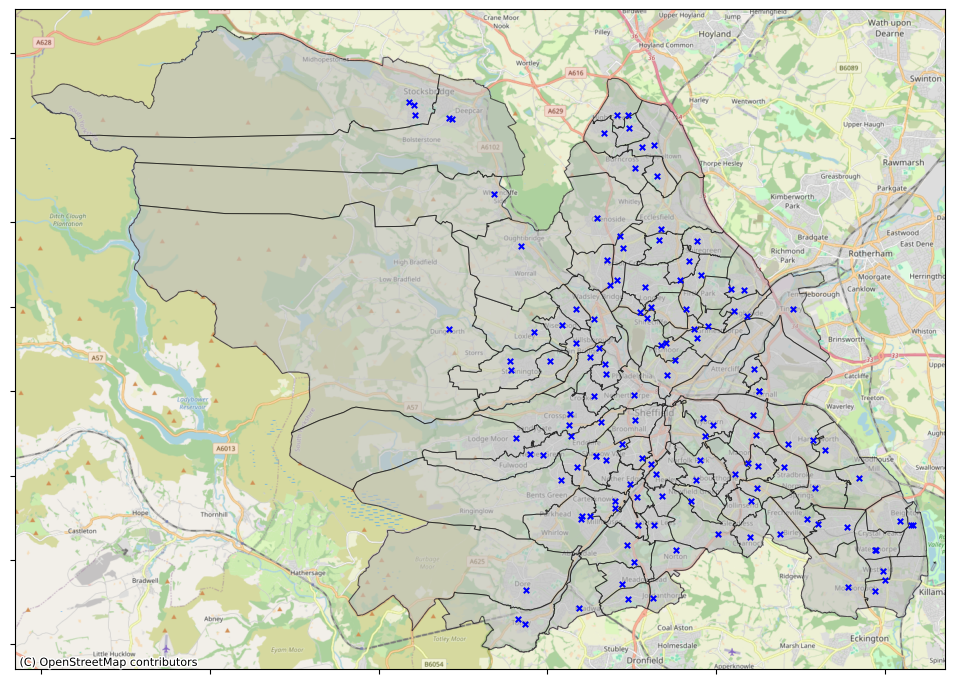

In [25]:
from shapely.ops import cascaded_union

fig, ax = plt.subplots(figsize=(12,18))
# Define Overall Polygon
overall_polygon = gdp.GeoSeries(cascaded_union(geo_df.geometry))
# # Define bounding box
bounds = overall_polygon.bounds
bounding_box = [
    bounds['minx'][0],
    bounds['maxx'][0],
    bounds['miny'][0],
    bounds['maxy'][0],
]
# Set bounds
ax.set_xlim(bounding_box[0]-1000, bounding_box[1] + 1000)
ax.set_ylim(bounding_box[2]-1000, bounding_box[3] + 1000)


# Plot primary borders
geo_df.plot(
    ax=ax, 
    alpha=0.6, 
    edgecolor='black', 
    linewidth=0.7,
    facecolor='silver',
)

sheff_gdf[
    (sheff_gdf['PhaseOfEducation (name)'] == 'Primary') & (sheff_gdf['EstablishmentStatus (name)'] == 'Open')
].plot(ax=ax,
                       markersize=15, 
                        color='blue', 
                    marker='x', 
                    label='Neg'
                      )


import contextily as cx # map backgrounds
# Add background
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# Remove axis 
ax.set_yticklabels([])
ax.set_xticklabels([])

# import matplotlib.patches as mpatches
# rural_patch = mpatches.Patch(facecolor='blue', edgecolor='red', alpha=0.3, label='Rural Parishes')
# not_rural_patch = mpatches.Patch(facecolor='silver', edgecolor='black', alpha=0.3, label='Not Rural Parishes')
# small_population_patch = mpatches.Patch(
#     facecolor='red', 
#     edgecolor='red', 
#     alpha=0.8, 
#     label='Smallest population:\n{0} - {1}'.format(
#         mini[mini.rural_label == 'Rural'].sort_values(by='population').head(1).population.values[0],
#         mini[mini.rural_label == 'Rural'].sort_values(by='population').head(1).PARNCP21NM.values[0]
#     )
# )

# large_population_patch = mpatches.Patch(
#     facecolor='green', 
#     edgecolor='green', 
#     alpha=0.8, 
#     label='Largest population:\n{0} - {1}'.format(
#         mini[mini.rural_label == 'Rural'].sort_values(by='population', ascending=False).head(1).population.values[0],
#         mini[mini.rural_label == 'Rural'].sort_values(by='population', ascending=False).head(1).PARNCP21NM.values[0]
#     )
# )
# leg = plt.legend(
#     handles=[rural_patch, not_rural_patch, small_population_patch, large_population_patch],
#     bbox_to_anchor=(0.79, 1),
#     loc=2,
#     borderaxespad=0.,
#     frameon=False,
#     prop={'size': 10}
# )
# plt.title("Map of Yorkshire and The Humber's Rural Parishes", fontsize=16)

# plt.savefig('../results/map_of_rural_parishes_yorkshire.png')

plt.show()

In [27]:
columns = ['id', 'price', 'date', 'postcode', 'property_type', 'old_new', 'duration', 'paon', 'saon', 'street', 'locality', 'town', 'district', 'county', 'ppd_category', 'record_status', 'uprn','parentuprn','usrn'] + ['x_coord', 'y_coord', 'lat', 'lon']
sale_prices = pd.read_csv('../data/sheffield_sales_only.csv', header=0, names=columns)
sale_prices.head()

,id,price,date,postcode,property_type,old_new,duration,paon,saon,street,locality,town,district,county,ppd_category,record_status,uprn,parentuprn,usrn,x_coord,y_coord,lat,lon
0,{0269B83C-19B0-49E2-B5D7-566FCEE85B5E},41995,1995-06-09,S25 2TG,S,Y,F,38,NaN,HUNTERS DRIVE,DINNINGTON,SHEFFIELD,ROTHERHAM,SOUTH YORKSHIRE,A,A,100050888670,NaN,32601830,452762.00,386970.00,53.376978,-1.208358
1,{5DA3A93B-A757-44C0-A01F-5A0AE036FB58},63000,1995-09-04,S26 3RH,D,N,F,14,NaN,AMBLER RISE,AUGHTON,SHEFFIELD,ROTHERHAM,SOUTH YORKSHIRE,A,A,100050883089,NaN,32603225,445357.00,386450.00,53.372990,-1.319733
2,{45F7DEF9-9712-4B8F-AEDB-4BBE7603DCBB},53995,1995-03-24,S26 2DT,S,Y,F,8,NaN,WALESWOOD VIEW,ASTON,SHEFFIELD,ROTHERHAM,SOUTH YORKSHIRE,A,A,100050897722,NaN,32603404,445968.80,384657.50,53.356826,-1.310798
3,{D8DCC736-4537-41E2-A821-EF6CFF2551A9},49950,1995-05-26,S10 1PG,T,N,F,139,NaN,HEAVYGATE ROAD,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,100050994491,NaN,34402954,433285.26,388161.54,53.389268,-1.500987
4,{AB2DE8CF-09C5-422A-9A30-F2F09709F4B7},29500,1995-08-30,S5 8WW,S,N,F,7,NaN,MILES ROAD,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,100051031916,NaN,34406391,434993.36,390323.62,53.408591,-1.475065


In [28]:
sale_prices.shape

(241394, 23)

In [29]:
sale_prices = sale_prices.assign(date=pd.to_datetime(sale_prices.date))
sale_prices.head()

,id,price,date,postcode,property_type,old_new,duration,paon,saon,street,locality,town,district,county,ppd_category,record_status,uprn,parentuprn,usrn,x_coord,y_coord,lat,lon
0,{0269B83C-19B0-49E2-B5D7-566FCEE85B5E},41995,1995-06-09,S25 2TG,S,Y,F,38,NaN,HUNTERS DRIVE,DINNINGTON,SHEFFIELD,ROTHERHAM,SOUTH YORKSHIRE,A,A,100050888670,NaN,32601830,452762.00,386970.00,53.376978,-1.208358
1,{5DA3A93B-A757-44C0-A01F-5A0AE036FB58},63000,1995-09-04,S26 3RH,D,N,F,14,NaN,AMBLER RISE,AUGHTON,SHEFFIELD,ROTHERHAM,SOUTH YORKSHIRE,A,A,100050883089,NaN,32603225,445357.00,386450.00,53.372990,-1.319733
2,{45F7DEF9-9712-4B8F-AEDB-4BBE7603DCBB},53995,1995-03-24,S26 2DT,S,Y,F,8,NaN,WALESWOOD VIEW,ASTON,SHEFFIELD,ROTHERHAM,SOUTH YORKSHIRE,A,A,100050897722,NaN,32603404,445968.80,384657.50,53.356826,-1.310798
3,{D8DCC736-4537-41E2-A821-EF6CFF2551A9},49950,1995-05-26,S10 1PG,T,N,F,139,NaN,HEAVYGATE ROAD,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,100050994491,NaN,34402954,433285.26,388161.54,53.389268,-1.500987
4,{AB2DE8CF-09C5-422A-9A30-F2F09709F4B7},29500,1995-08-30,S5 8WW,S,N,F,7,NaN,MILES ROAD,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,100051031916,NaN,34406391,434993.36,390323.62,53.408591,-1.475065


In [31]:
import datetime

In [33]:
since_2020 = sale_prices[sale_prices.date >= "2020-01-01"]
since_2020.head()

,id,price,date,postcode,property_type,old_new,duration,paon,saon,street,locality,town,district,county,ppd_category,record_status,uprn,parentuprn,usrn,x_coord,y_coord,lat,lon
226487,{AC07BBCF-FCCD-0445-E053-6C04A8C01E31},156000,2020-04-03,S21 1EU,T,N,F,48,NaN,WESTTHORPE ROAD,KILLAMARSH,SHEFFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A,100030231198,NaN,27701524,445652.51,380228.62,53.317048,-1.316188
226488,{AC07BBCF-FCD2-0445-E053-6C04A8C01E31},155000,2020-06-12,S21 4HS,S,N,F,15,NaN,KESTREL DRIVE,ECKINGTON,SHEFFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A,100030222458,NaN,27700798,441812.52,379067.13,53.306923,-1.373975
226489,{AC07BBCF-FF22-0445-E053-6C04A8C01E31},140000,2020-05-29,S21 1FA,T,N,F,75,NaN,ROWAN TREE ROAD,KILLAMARSH,SHEFFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A,10034041404,NaN,27701240,445138.15,380693.32,53.321267,-1.323842
226490,{AC07BBCF-FF27-0445-E053-6C04A8C01E31},125000,2020-03-24,S21 4ET,T,N,F,44,NaN,OSMUND ROAD,ECKINGTON,SHEFFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A,100030225417,NaN,27701093,442064.39,379197.71,53.308077,-1.370179
226491,{AC07BBCF-FD2E-0445-E053-6C04A8C01E31},145000,2020-05-22,S21 4AP,S,N,F,31,NaN,BEECH CRESCENT,ECKINGTON,SHEFFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A,100030214800,NaN,27700097,441963.05,378444.80,53.301318,-1.371798


In [34]:
geometry = [Point(xy) for xy in zip(since_2020['lon'], since_2020['lat'])]
crs="EPSG:4326"
sale_gdf = GeoDataFrame(since_2020, geometry=geometry, crs=crs)
sale_gdf = sale_gdf.to_crs('3857')
sale_gdf.head()

,id,price,date,postcode,property_type,old_new,duration,paon,saon,street,locality,town,district,county,ppd_category,record_status,uprn,parentuprn,usrn,x_coord,y_coord,lat,lon,geometry
226487,{AC07BBCF-FCCD-0445-E053-6C04A8C01E31},156000,2020-04-03,S21 1EU,T,N,F,48,NaN,WESTTHORPE ROAD,KILLAMARSH,SHEFFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A,100030231198,NaN,27701524,445652.51,380228.62,53.317048,-1.316188,POINT (-146517.322 7041859.905)
226488,{AC07BBCF-FCD2-0445-E053-6C04A8C01E31},155000,2020-06-12,S21 4HS,S,N,F,15,NaN,KESTREL DRIVE,ECKINGTON,SHEFFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A,100030222458,NaN,27700798,441812.52,379067.13,53.306923,-1.373975,POINT (-152950.220 7039973.431)
226489,{AC07BBCF-FF22-0445-E053-6C04A8C01E31},140000,2020-05-29,S21 1FA,T,N,F,75,NaN,ROWAN TREE ROAD,KILLAMARSH,SHEFFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A,10034041404,NaN,27701240,445138.15,380693.32,53.321267,-1.323842,POINT (-147369.384 7042646.204)
226490,{AC07BBCF-FF27-0445-E053-6C04A8C01E31},125000,2020-03-24,S21 4ET,T,N,F,44,NaN,OSMUND ROAD,ECKINGTON,SHEFFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A,100030225417,NaN,27701093,442064.39,379197.71,53.308077,-1.370179,POINT (-152527.584 7040188.387)
226491,{AC07BBCF-FD2E-0445-E053-6C04A8C01E31},145000,2020-05-22,S21 4AP,S,N,F,31,NaN,BEECH CRESCENT,ECKINGTON,SHEFFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A,100030214800,NaN,27700097,441963.05,378444.80,53.301318,-1.371798,POINT (-152707.877 7038929.177)


In [37]:
geo_df.head()

,CATCH_NUM,CATCHMENT,Shape_area,Shape_len,geometry
0,2001,Abbey Lane IJ,2.812735e+06,11091.133823,"POLYGON ((-165736.576 7047192.556, -165703.449..."
1,2002,Nether Edge NIJ,8.801766e+05,5517.909354,"POLYGON ((-165669.086 7050817.062, -165655.826..."
2,2343,Anns Grove NIJ,1.203991e+06,7690.489053,"POLYGON ((-162526.055 7051876.426, -162516.392..."
3,3429,Arbourthorne NIJ,8.184401e+05,5726.122791,"POLYGON ((-161838.427 7049380.957, -161822.607..."
4,2322,Bankwood NIJ,1.252839e+06,6128.917022,"POLYGON ((-162404.033 7049476.989, -162379.696..."


In [39]:
geo_df.sjoin(sale_gdf,how="inner", predicate='intersects').head()

,CATCH_NUM,CATCHMENT,Shape_area,Shape_len,geometry,index_right,id,price,date,postcode,property_type,old_new,duration,paon,saon,street,locality,town,district,county,ppd_category,record_status,uprn,parentuprn,usrn,x_coord,y_coord,lat,lon
0,2001,Abbey Lane IJ,2.812735e+06,11091.133823,"POLYGON ((-165736.576 7047192.556, -165703.449...",240799,{D4D42646-6144-27F6-E053-6C04A8C0A572},301500,2021-09-23,S8 7UH,T,N,F,248,NaN,MEADOW HEAD,NaN,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,100051029544,NaN,34404734,434936.89,381764.91,53.331667,-1.476857
0,2001,Abbey Lane IJ,2.812735e+06,11091.133823,"POLYGON ((-165736.576 7047192.556, -165703.449...",240412,{D4D42646-644A-27F6-E053-6C04A8C0A572},399950,2021-06-11,S8 7UN,S,N,F,221,NaN,MEADOW HEAD,NaN,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,100051029517,NaN,34404734,434997.06,381783.28,53.331829,-1.475952
0,2001,Abbey Lane IJ,2.812735e+06,11091.133823,"POLYGON ((-165736.576 7047192.556, -165703.449...",232322,{BEF7EBBF-59ED-7A76-E053-6B04A8C092F7},290000,2020-06-03,S8 8GA,S,N,F,13,NaN,LITTLE NORTON LANE,NaN,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,100051016014,NaN,34404707,435035.73,381812.40,53.332088,-1.475368
0,2001,Abbey Lane IJ,2.812735e+06,11091.133823,"POLYGON ((-165736.576 7047192.556, -165703.449...",235624,{D707E535-FEB8-0AD9-E053-6B04A8C067CC},276475,2021-07-02,S8 8GA,S,N,F,11,NaN,LITTLE NORTON LANE,NaN,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,100051016010,NaN,34404707,435026.66,381812.81,53.332092,-1.475504
0,2001,Abbey Lane IJ,2.812735e+06,11091.133823,"POLYGON ((-165736.576 7047192.556, -165703.449...",229003,{B5755FFE-690D-7D01-E053-6C04A8C036B6},282000,2020-09-11,S8 7UN,S,N,F,219A,NaN,MEADOW HEAD,NaN,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,100051029514,NaN,34404734,434968.67,381818.36,53.332146,-1.476374


In [42]:
geo_df.head()

,CATCH_NUM,CATCHMENT,Shape_area,Shape_len,geometry
0,2001,Abbey Lane IJ,2.812735e+06,11091.133823,"POLYGON ((-165736.576 7047192.556, -165703.449..."
1,2002,Nether Edge NIJ,8.801766e+05,5517.909354,"POLYGON ((-165669.086 7050817.062, -165655.826..."
2,2343,Anns Grove NIJ,1.203991e+06,7690.489053,"POLYGON ((-162526.055 7051876.426, -162516.392..."
3,3429,Arbourthorne NIJ,8.184401e+05,5726.122791,"POLYGON ((-161838.427 7049380.957, -161822.607..."
4,2322,Bankwood NIJ,1.252839e+06,6128.917022,"POLYGON ((-162404.033 7049476.989, -162379.696..."


In [44]:
mergey = sale_gdf.sjoin(geo_df[['CATCHMENT', 'geometry']], how='inner', predicate='intersects')
mergey.head()

,id,price,date,postcode,property_type,old_new,duration,paon,saon,street,locality,town,district,county,ppd_category,record_status,uprn,parentuprn,usrn,x_coord,y_coord,lat,lon,geometry,index_right,CATCHMENT
226511,{A96E4ACC-ED8F-9205-E053-6C04A8C0DA09},200000,2020-02-07,S20 5FS,S,Y,F,1,NaN,PELHAM CLOSE,MOSBOROUGH,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,B,A,10094031560,NaN,34410664,442334.71,381015.71,53.324396,-1.365881,POINT (-152049.155 7043229.317),71,Mosborough IJ
226647,{BC8936BB-FEE4-0E2C-E053-6C04A8C0DBF4},385000,2020-12-11,S20 5DX,D,N,L,7,NaN,PARKGATE CROFT,MOSBOROUGH,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,100051049797,NaN,34407748,441396.55,382012.32,53.333428,-1.379835,POINT (-153602.485 7044912.789),71,Mosborough IJ
226930,{BC8936BB-FDE6-0E2C-E053-6C04A8C0DBF4},140000,2020-12-10,S20 5DF,T,N,F,32,NaN,SOUTH STREET,MOSBOROUGH,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,100051078313,NaN,34407881,442559.00,380719.00,53.321711,-1.362554,POINT (-151678.773 7042728.931),71,Mosborough IJ
227030,{BC8936BB-FE52-0E2C-E053-6C04A8C0DBF4},120000,2020-12-18,S20 5AS,S,N,F,93,NaN,ELM CRESCENT,MOSBOROUGH,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,100050964007,NaN,34407527,442538.00,381641.00,53.330000,-1.362745,POINT (-151700.124 7044273.800),71,Mosborough IJ
227146,{A96E4ACC-9639-9205-E053-6C04A8C0DA09},199995,2020-05-22,S20 5FQ,S,N,F,5,NaN,REDWOOD LANE,MOSBOROUGH,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A,10093470519,NaN,34410639,442677.07,381589.06,53.329522,-1.360664,POINT (-151468.468 7044184.701),71,Mosborough IJ


In [64]:
taha = mergey[['price', 'CATCHMENT']].groupby('CATCHMENT').mean().reset_index()
other_hah = mergey[['price', 'CATCHMENT']].groupby('CATCHMENT').size()
taha.head()

,CATCHMENT,price
0,Abbey Lane IJ,288189.065728
1,Abbeyfield NIJ,151101.532258
2,Acres Hill NIJ,111383.728814
3,Angram Bank NIJ,177980.714286
4,Anns Grove NIJ,156776.229630


In [68]:
taha.sort_values(by='price', ascending=False).head()

,CATCHMENT,price
80,Springfield NIJ,4.586062e+06
60,Netherthorpe NIJ,5.675350e+05
92,Whiteways NIJ,5.335526e+05
21,Dobcroft I & J,5.233399e+05
22,Dore IJ,5.206922e+05


In [50]:
big_geo = geo_df.merge(taha, how='inner', on='CATCHMENT')
big_geo.head()

,CATCH_NUM,CATCHMENT,Shape_area,Shape_len,geometry,price
0,2001,Abbey Lane IJ,2.812735e+06,11091.133823,"POLYGON ((-165736.576 7047192.556, -165703.449...",288189.065728
1,2002,Nether Edge NIJ,8.801766e+05,5517.909354,"POLYGON ((-165669.086 7050817.062, -165655.826...",270223.364162
2,2343,Anns Grove NIJ,1.203991e+06,7690.489053,"POLYGON ((-162526.055 7051876.426, -162516.392...",156776.229630
3,3429,Arbourthorne NIJ,8.184401e+05,5726.122791,"POLYGON ((-161838.427 7049380.957, -161822.607...",97441.750000
4,2322,Bankwood NIJ,1.252839e+06,6128.917022,"POLYGON ((-162404.033 7049476.989, -162379.696...",115103.378049


In [52]:
big_geo.price.describe()

count    1.000000e+02
mean     2.481358e+05
std      4.507949e+05
min      7.173006e+04
25%      1.314588e+05
50%      1.798666e+05
75%      2.432599e+05
max      4.586062e+06
Name: price, dtype: float64

In [54]:
4.586e6

4586000.0

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_57433/321909535.py:2: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  overall_polygon = gdp.GeoSeries(cascaded_union(big_geo.geometry))


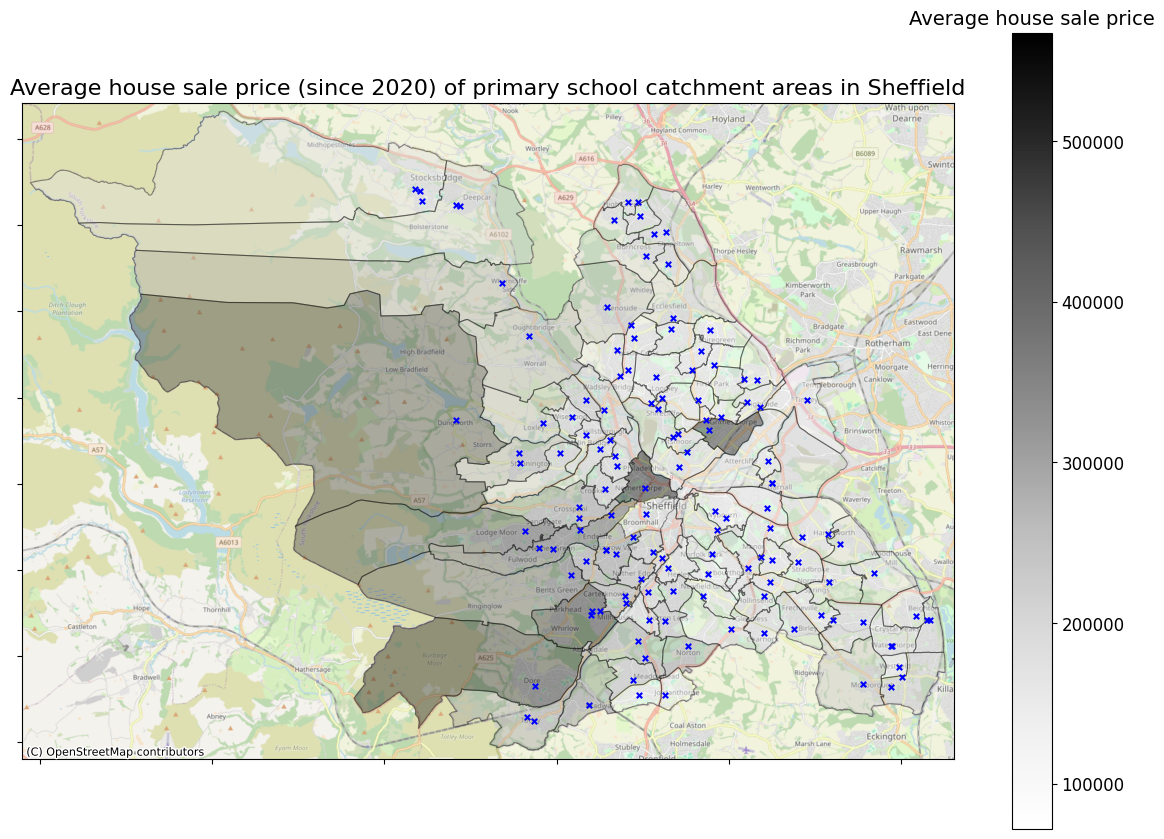

In [70]:
fig, ax = plt.subplots(figsize=(12,18))
overall_polygon = gdp.GeoSeries(cascaded_union(big_geo.geometry))
bounds = overall_polygon.bounds
bounding_box = [
    bounds['minx'][0],
    bounds['maxx'][0],
    bounds['miny'][0],
    bounds['maxy'][0],
]
# Set bounds
ax.set_xlim(bounding_box[0]-500, bounding_box[1] + 500)
ax.set_ylim(bounding_box[2]-500, bounding_box[3] + 500)

# Plot borough borders
big_geo[big_geo.CATCHMENT != 'Springfield NIJ'].plot(
    ax=ax, 
    column='price',
    alpha=0.4, 
    edgecolor='black', 
    linewidth=0.8,
    cmap='Greys',
    legend=True,
    legend_kwds={'shrink': 0.45}
)

sheff_gdf[
    (sheff_gdf['PhaseOfEducation (name)'] == 'Primary') & (sheff_gdf['EstablishmentStatus (name)'] == 'Open')
].plot(ax=ax,
                       markersize=15, 
                        color='blue', 
                    marker='x', 
                    label='Neg'
                      )

colorbar_ax = ax.get_figure().axes[-1] #to get the last axis of the figure, it's the colorbar axes
colorbar_ax.set_title("Average house sale price", size=14)
colorbar_ax.tick_params(labelsize=12)

# Add background
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, alpha=0.8)

# Remove axis 
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.title("Average house sale price (since 2020) of primary school catchment areas in Sheffield", fontsize=16)
plt.tight_layout()
plt.savefig('../results/sheffield_primary_school_average_prices.png', dpi=300, bbox_inches='tight')
plt.show()